In [11]:
from gensim.models import Word2Vec
import duckdb

from datetime import datetime
import re
import time
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

%matplotlib inline

In [2]:
db_string   = "/Users/patrick/dev/ucl/word2vec/COMP_0158_MSC_PROJECT/database/w2v_20240731_test.db"
output_dir  ='/Users/patrick/dev/ucl/word2vec/COMP_0158_MSC_PROJECT/logs/clustering/'

### Analyse CLANS

In [55]:
#
# W2V_PFAM_CLAN_MC1 has 15,481 entries
#
def get_clan_pfam_counts():
    con = duckdb.connect(database=db_string)
    try:
        df = con.execute("SELECT CLAN_ID, COUNT(*) AS item_count FROM W2V_PFAM_CLAN_MC1 WHERE CLAN_ID !='undef' GROUP BY CLAN_ID ORDER BY item_count DESC").df()
    except Exception as e:
        print('Error executing query :', e)
        con.close()
        return
    return df
    con.close()

### box plot

Number of clans : 689
Average Count: 10.90711175616836
Max: 361
95th Percentile of Count: 36.0
99th Percentile of Count: 120.40000000000009


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_56130/2073458250.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clan_df, x="clan_id", y ="item_count", palette="Blues_r")


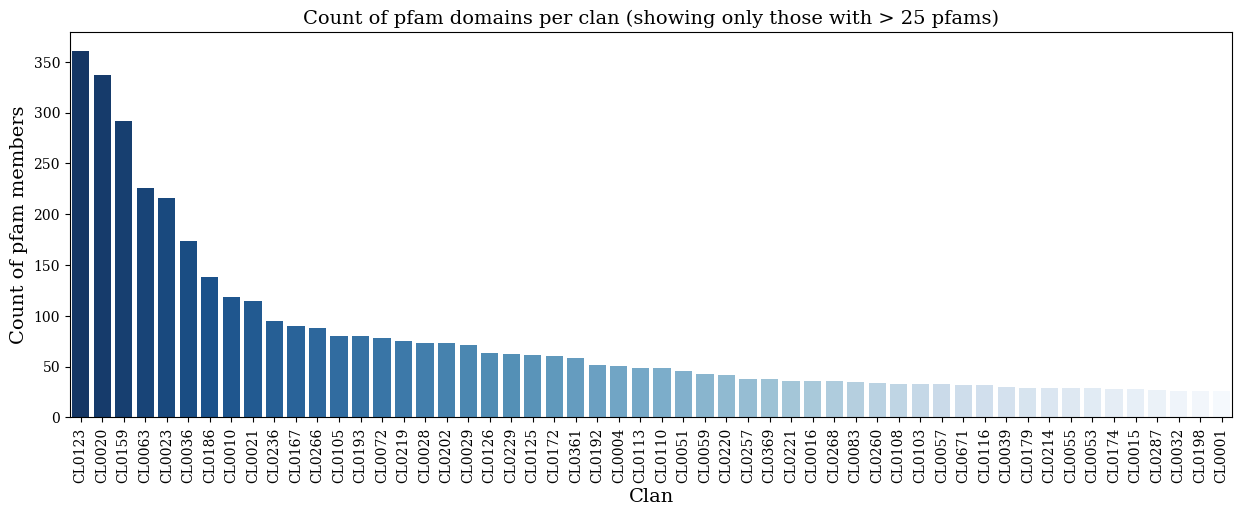

In [69]:
   
df = get_clan_pfam_counts()

print(f"Number of clans : {df.shape[0]}")
# get basic stats
mean = df['item_count'].mean()
max = df['item_count'].max()
percentile_95 = df['item_count'].quantile(0.95)
percentile_99 = df['item_count'].quantile(0.99)

print(f'Average Count: {mean}')
print(f'Max: {max}')
print(f'95th Percentile of Count: {percentile_95}')
print(f'99th Percentile of Count: {percentile_99}')



# show a barplot of counts per clan
clan_df = df[(df['item_count'] > 25)]

plt.rc('font', family='serif')
plt.figure(figsize=(15, 5))

sns.barplot(data=clan_df, x="clan_id", y ="item_count", palette="Blues_r")

plt.xticks(rotation = 90, fontsize='10')

plt.xlabel('Clan', fontsize='14')
plt.ylabel('Count of pfam members', fontsize='14')

plt.title('Count of pfam domains per clan (showing only those with > 25 pfams)', fontsize='14')
plt.show()





### kdeplot

/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_56130/2806516593.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=clan_df, x='item_count', shade='True', color='midnightblue')


<function matplotlib.pyplot.show(close=None, block=None)>

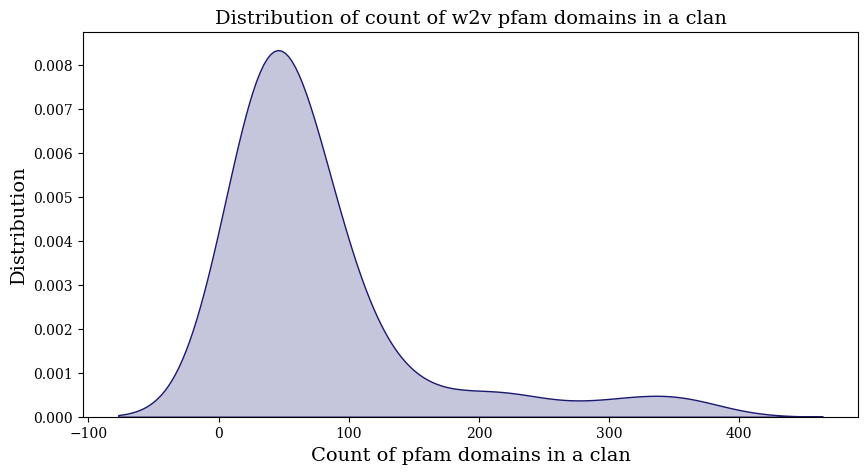

In [67]:
   
df = get_clan_pfam_counts()

# show a barplot of counts per clan
clan_df = df[(df['item_count'] > 25)]

plt.rc('font', family='serif')
plt.figure(figsize=(10, 5))

sns.kdeplot(data=clan_df, x='item_count', shade='True', color='midnightblue')

plt.xlabel('Count of pfam domains in a clan', fontsize='14')
plt.ylabel('Distribution', fontsize='14')

plt.title('Distribution of count of w2v pfam domains in a clan', fontsize='14')

plt.show



In [84]:
df = get_clan_pfam_counts()

print(f"Number of clans : {df.shape[0]}. 95th: {df['item_count'].quantile(0.95)}. 97.5th: {df['item_count'].quantile(0.975)} . 99th: {df['item_count'].quantile(0.99)}")


for item_count in range(50):
    # show a barplot of counts per clan
    clan_df = df[(df['item_count'] >= item_count)]

    print(f"{item_count} : {clan_df.shape[0]} clans")

Number of clans : 689. 95th: 36.0. 97.5th: 72.59999999999991 . 99th: 120.40000000000009
0 : 689 clans
1 : 689 clans
2 : 631 clans
3 : 479 clans
4 : 375 clans
5 : 293 clans
6 : 255 clans
7 : 225 clans
8 : 197 clans
9 : 170 clans
10 : 147 clans
11 : 130 clans
12 : 125 clans
13 : 115 clans
14 : 103 clans
15 : 95 clans
16 : 92 clans
17 : 83 clans
18 : 78 clans
19 : 76 clans
20 : 71 clans
21 : 65 clans
22 : 60 clans
23 : 58 clans
24 : 58 clans
25 : 56 clans
26 : 54 clans
27 : 51 clans
28 : 50 clans
29 : 48 clans
30 : 44 clans
31 : 43 clans
32 : 43 clans
33 : 41 clans
34 : 38 clans
35 : 37 clans
36 : 36 clans
37 : 33 clans
38 : 33 clans
39 : 31 clans
40 : 31 clans
41 : 31 clans
42 : 31 clans
43 : 30 clans
44 : 29 clans
45 : 29 clans
46 : 29 clans
47 : 28 clans
48 : 28 clans
49 : 28 clans


## UTILS

In [86]:
#
# W2V_PFAM_CLAN_MC1 has 15,481 entries
#
def execute_db_query():
    con = duckdb.connect(database=db_string)
    try:
        
        #results = con.execute("DESCRIBE W2V_PFAM_CLAN_MC1").fetchall()
        #results = con.execute("DESCRIBE W2V_CLAN_PFAM_COUNT").fetchall()
        #results = con.execute("SELECT DISTINCT CLAN_ID FROM W2V_PFAM_CLAN_MC1").fetchall()
        
        # really useful to find which clans have more than one pfam
        #results = con.execute("SELECT CLAN_ID, COUNT(*) AS item_count FROM W2V_PFAM_CLAN_MC1 GROUP BY CLAN_ID ORDER BY item_count DESC").fetchall()
        
        #results = con.execute("SELECT COUNT(*) FROM W2V_CLAN_PFAM_COUNT").fetchall()     
        #results = con.execute("SELECT COUNT(*) FROM W2V_PFAM_CLAN_MC1").fetchall()
        #results = con.execute("SELECT COUNT(*) FROM W2V_PFAM_CLAN_MC1 WHERE CLAN_ID='undef'").fetchall()
        result = con.execute(f"SELECT PFAM_ID, CLAN_ID FROM W2V_PFAM_CLAN_MC1 WHERE PFAM_ID ='{pfam_id}'").fetchall()
        
        #results = con.execute("SELECT CLAN_ID, COUNT(*) AS item_count FROM W2V_PFAM_CLAN_MC1 GROUP BY CLAN_ID").fetchall()

        for res in results:
            print(res)
    except Exception as e:
        print('Error executing query :', e)
        con.close()
        return
    con.close()
execute_db_query()

Error executing query : name 'pfam_id' is not defined


In [ ]:
#
# W2V_PFAM_CLAN_MC1 has 15,481 entries
#
def get_clan_pfam_counts():
    con = duckdb.connect(database=db_string)
    try:

        # really useful to find which clans have more than one pfam
        results = con.execute("SELECT CLAN_ID, COUNT(*) AS item_count FROM W2V_PFAM_CLAN_MC1 GROUP BY CLAN_ID ORDER BY item_count DESC").fetchall()

        for res in results:
            print(res)
    except Exception as e:
        print('Error executing query :', e)
        con.close()
        return
    con.close()
    
get_clan_pfam_counts()

In [88]:
def find_files(directory, extn):
    files_info = []
    # Traverse the directory recursively
    for file_path in Path(directory).rglob(f"*{extn}"):
        if file_path.is_file():  # Check if it's a file
            filename = file_path.stem  # Get the filename without extension
            file_extension = file_path.suffix  # Get the file extension
            files_info.append((str(file_path), filename, file_extension))
    return files_info

### Check model type

In [120]:
model_dir       = "/Users/patrick/dev/ucl/word2vec/comp_0158_msc_project/data/models/0920_g50/cbow/"

def find_model_type(model_name, model_path):
    try:
        model = Word2Vec.load(model_path)
        print(f"{model_name} \t: {model.sg}")
    except Exception as e:
        print(f"Error loading {model_name}. {e}")
    

model_files     = find_files(model_dir, 'model')
for model_file in model_files:
    model_path  = model_file[0]
    model_name  = model_file[1]
    model_path  = model_dir+model_name+'.model'
    #print(model_path)
    find_model_type(model_name, model_path)
    

w2v_20240921_0_mc8_w13_v500_g50 	: 0
w2v_20240921_0_mc5_w13_v500_g50 	: 0
w2v_20240920_0_mc8_w44_v25_g50 	: 0
w2v_20240920_0_mc5_w13_v5_g50 	: 0
w2v_20240920_0_mc5_w21_v25_g50 	: 0
w2v_20240921_0_mc5_w21_v250_g50 	: 0
w2v_20240921_0_mc8_w21_v250_g50 	: 0
w2v_20240921_0_mc3_w44_v100_g50 	: 0
w2v_20240921_0_mc3_w21_v100_g50 	: 0
w2v_20240921_0_mc8_w44_v250_g50 	: 0
w2v_20240921_0_mc5_w44_v250_g50 	: 0
w2v_20240921_0_mc8_w44_v50_g50 	: 0
w2v_20240921_0_mc5_w21_v50_g50 	: 0
w2v_20240920_0_mc8_w44_v5_g50 	: 0
w2v_20240920_0_mc8_w13_v25_g50 	: 0
w2v_20240921_0_mc3_w21_v50_g50 	: 0
w2v_20240921_0_mc5_w21_v100_g50 	: 0
w2v_20240921_0_mc8_w21_v100_g50 	: 0
w2v_20240921_0_mc3_w44_v250_g50 	: 0
w2v_20240920_0_mc3_w44_v5_g50 	: 0
w2v_20240920_0_mc3_w21_v5_g50 	: 0
w2v_20240921_0_mc8_w13_v50_g50 	: 0
w2v_20240920_0_mc3_w21_v25_g50 	: 0
w2v_20240921_0_mc3_w21_v250_g50 	: 0
w2v_20240921_0_mc8_w44_v100_g50 	: 0
w2v_20240921_0_mc5_w44_v100_g50 	: 0
w2v_20240921_0_mc3_w13_v500_g50 	: 0
w2v_20240920_0_mc

### PCA Graphs

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs


def graph_2d_pca_color(X_full, categories, title):
    comic_font  = {'fontname':'Comic Sans MS'}
    helv_font   = {'fontname':'Helvetica'}
    
    categores_np        = np.array(categories)
    unique_categories   = np.unique(categores_np)
    
    # reduce X into 2 dimensions
    pca = PCA(n_components=2)
    X   = pca.fit_transform(X_full)

    # Define a colormap that can handle the variable number of categories
    cmap = plt.get_cmap('tab20', len(unique_categories))

    # Plotting
    plt.figure(figsize=(8, 6))

    # Scatter plot where the color depends on the category
    for i, category in enumerate(unique_categories):

        # get indices for current category    
        indices = np.where(categores_np == category)
        X_cat = X[indices]
        
        # Plot points with a color corresponding to the category
        plt.scatter(X_cat[:, 0], X_cat[:, 1], label=f'clan {category}', color=cmap(i), s=10)
        
    # Add title and labels
    plt.xlabel("W2V Vocab Embedding - Principal Component 1")
    plt.ylabel("W2V Vocab Embedding - Principal Component 2")
    plt.title(title, **helv_font)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()



In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def graph_3d_pca_colour(X_full, categories, title):
    comic_font  = {'fontname':'Comic Sans MS'}
    helv_font   = {'fontname':'Helvetica'}
    
    categories_np       = np.array(categories)
    unique_categories   = np.unique(categories_np)
    
    print(f"Plotting {X_full.shape[0]} from {len(unique_categories)} categories")

    # Apply PCA to reduce the dimensionality to 3D
    pca = PCA(n_components=3)
    X   = pca.fit_transform(X_full)

    # Create a 3D scatter plot and a colour map - one per category
    fig     = plt.figure(figsize=(8, 6))
    ax      = fig.add_subplot(111, projection='3d')
    cmap    = plt.cm.get_cmap('tab20', len(unique_categories))
    
    # set various colours of the graph
    fig.patch.set_facecolor('white')    # Overall figure background - incl labels
    ax.set_facecolor('white')           # Plot background
    
    ax.xaxis.pane.fill = True
    ax.yaxis.pane.fill = True
    ax.zaxis.pane.fill = True

    # Set the color you want for the plot area (inside the axes)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # light gray
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # light gray
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # light gray
    
    # grid colour
    ax.xaxis._axinfo['grid'].update(color='lightgrey')
    ax.yaxis._axinfo['grid'].update(color='lightgrey')
    ax.zaxis._axinfo['grid'].update(color='lightgrey')
    
    
    
   
    # Plot each point in the corresponding color based on its category
    for i, category in enumerate(unique_categories):
        # get indices for current category    
        indices = np.where(categories_np == category)
        X_cat   = X[indices]
        
        ax.scatter(X_cat[:, 0], X_cat[:, 1], X_cat[:, 2], label=f'Clan {category}', color=cmap(i), s=10)

    # Add labels and title
    ax.set_xlabel('W2V Vocab - PC 1')
    ax.set_ylabel('W2V Vocab - PC 2')
    ax.set_zlabel('W2V Vocab - PC 3')
    ax.set_title(title)

    # Show legend and plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
    plt.tight_layout()
    plt.show()

#graph_3d_pca_colour()

### PFAM Vocab utils

In [91]:
#
# extracts the words used in a word2vec model by wuerying the model itself
# returns a list of words with any whitespace remoived as well as count of the umber of items
#       
def get_pfam_vocab(model_path, exclude_gaps=False):
    model = Word2Vec.load(model_path)
    
    vocab         = model.wv.key_to_index
    pfam_vocab    = []
    for i, word in enumerate(vocab):
        if ( exclude_gaps and (word == 'GAP' or word == 'START_GAP' or word == 'STOP_GAP' or word == 'DISORDER')):
            #print('ignoring', word)
            continue
        else:
            word = word.lstrip()
            word = word.rstrip()
            pfam_vocab.append(word)
    return pfam_vocab, len(pfam_vocab)


#
# Retrieves the pfams for a model as long as they belong to a clan
#
def get_pfam_vocab_clan_only(model_path):
    model = Word2Vec.load(model_path)    
    pfam_w_clan_ids  = []
    
    full_vocab, num_items = get_pfam_vocab(model_path)
    con = duckdb.connect(database=db_string)
    
    for pfam_id in full_vocab:
        try:          
            result = con.execute(f"SELECT PFAM_ID, CLAN_ID FROM W2V_PFAM_CLAN_MC1 WHERE PFAM_ID ='{pfam_id}'").fetchall()

            if(result != []):
                #print(result)
                pfam_result = result[0][0]
                clan_result = result[0][1]
                
                if clan_result != 'undef':
                    #print(f" ----------------- adding {clan_result} for {pfam_result}")
                    pfam_w_clan_ids.append(pfam_result)
                #else:
                #    print(f"ignoring {clan_result} for {pfam_result}")
        except Exception as e:
            print('Error', e, pfam_id)
            con.close()
            return
    con.close()
    
    return pfam_w_clan_ids

### Vectors for model

In [ ]:
'''

# Retrieves a subset of vectors from a w2v model dictionary - those being the vectors corresponding to pfam words
# in the dictionary that only have mappings to clans. This subset will be used to train model and see if it can
# accurately predict the labels of a test set
#
def get_model_vectors_clan_only(model_path, min_count, vector_size):
    
    model = Word2Vec.load(model_path)
    # I just happen to know that we will end up with 6,133 words, each with a vector of 25 dimensions
    
    if(min_count == 'mc1'):
        num_rows = 7508
    elif(min_count == 'mc3'):
        num_rows = 6745
    elif(min_count == 'mc5'):
        num_rows = 6419
    elif(min_count == 'mc8'):
        num_rows = 6133
    
    # create matrices and arrays for data
    X           = np.empty((num_rows, vector_size))
    X_pfam_ids  = []
    Y           = []
    
    #print(f"Created matrix X {X.shape}")
    
    full_vocab, num_items = get_pfam_vocab(model_path)
    con = duckdb.connect(database=db_string)
    count = 0
    for pfam_id in full_vocab:
        try:          
            result = con.execute(f"SELECT PFAM_ID, CLAN_ID FROM W2V_PFAM_CLAN_MC1 WHERE PFAM_ID ='{pfam_id}'").fetchall()
            
            #if(result == []):
            #    print(f"No results for {pfam_id}")
            if(result != []):
                #print(result)
                pfam_result = result[0][0]
                clan_result = result[0][1]
                
                if clan_result != 'undef':
                    #print(f" ----------------- adding {clan_result} for {pfam_result}")
                    X_pfam_ids.append(pfam_result)
                    Y.append(clan_result)
                    X[count,:] = model.wv[pfam_result]
                    count +=1
                #else:
                #    print(f"ignoring {clan_result} for {pfam_result}")
        except Exception as e:
            print('Error', e, pfam_id)
            con.close()
            return
    #print(f"model with mc {min_count} has {count} pfam-clan pairs.")
    con.close()
    
    return X, Y, X_pfam_ids
    '''

In [12]:
#
# Retrieves a subset of vectors from a w2v model dictionary - those being the vectors corresponding to pfam words
# in the dictionary that only have mappings to clans. This subset will be used to train model and see if it can
# accurately predict the labels of a test set
#
def get_clustering_inputs(model_path, pfams_ids, vector_dims):
    
    model = Word2Vec.load(model_path)
    
    N = len(pfams_ids)
    D = vector_dims

    # create matrices and arrays for data
    X = np.empty((N, D))
    Y = []
    
    con     = duckdb.connect(database=db_string)
    count   = 0
    for pfam_id in pfams_ids:
        try:          
            result = con.execute(f"SELECT PFAM_ID, CLAN_ID FROM W2V_PFAM_CLAN_MC1 WHERE PFAM_ID ='{pfam_id}'").fetchall()
            
            if(result == []):
                raise Exception(f"No results for {pfam_id}")

            if(result != []):
                pfam_result = result[0][0]
                clan_result = result[0][1]
                
                if clan_result != 'undef':
                    Y.append(clan_result)
                    X[count,:] = model.wv[pfam_result]
                    count +=1
                else:
                    print(f"ignoring {clan_result} for {pfam_result}")
                    raise Exception(f"Clan {clan_result} for {pfam_result}")
        except Exception as e:
            print('Error', e, pfam_id)
            con.close()
            return
    con.close()
    
    return X, Y

In [73]:
#
# gets the count of pfams in a clan
#
def get_clan_count(clan_id):
    con = duckdb.connect(database=db_string)
    try:          
        result = con.execute(f"SELECT COUNT FROM W2V_CLAN_PFAM_COUNT WHERE CLAN_ID ='{clan_id}'").fetchall()
        con.close()
        if result is None or result == []:
            return 0
        else:
            return result[0][0]
            
    except Exception as e:
        print('get_clan_count - error', e)
        con.close()
        return
    con.close()


#### Get pfams for a model as long as the clans they are in have >1 pfam

In [92]:
#
# For a model, this method gets all the pfam words in the model and then finds the clan id in the database
# if the pfam entry is not in the database, it will return only pfams that are in clans that have more
# than min_clan_size entries
#
def get_pfam_clans_for_model(model_name, model_path, min_clan_size):
    #print(f"get_pfam_clans_for_model() {model_name}, {model_path}")
    min_count_s = re.search("(mc[0-9]+)_", model_name)
    min_count = min_count_s.group(1)
    
    # call to various tility methods - get vocab that includes pfam ids only
    vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=True)
    #print(f"{min_count}: Found {vocab_count}, pfam words in {model_name}. items[0-10] {vocab[0:10]}")
    
    # see if there is an entry
    con = duckdb.connect(database=db_string)
    
    filtered_clans  = []
    filtered_pfams  = []
    clan_dict       = {}
    filtered_clan_dict = {}
    
    # loop through each pfam, find its clan and build up a dictinary of clans > pfam_ids
    for pfam_id in vocab:
        try:          
            results = con.execute(f"SELECT CLAN_ID FROM W2V_PFAM_CLAN_MC1 WHERE PFAM_ID='{pfam_id}'").fetchall()
            
            # if no result, get from interpro
            if(results is None or results ==[]):
                clan_id = get_interpro_clan(pfam_id)
                print(f"----------> No local clan entry for {pfam_id}, queried interpro w/ result:{pfam_id}:{clan_id}")
                #con.execute(f"INSERT INTO W2V_PFAM_CLAN (PFAM_ID, CLAN_ID) VALUES ('{pfam_id}', '{clan_id}')")
            else:
                clan_id = results[0][0]
                if (clan_id != 'undef'):
                    #add clan id to dictionary
                    if clan_id in clan_dict:
                        clan_dict[clan_id].append(pfam_id)  # Append to the list if the key exists
                    else:
                        clan_dict[clan_id] = [pfam_id]
        except Exception as e:
            print('get_pfam_clans_for_model() error', e, results)
            con.close()
            return
    con.close()
    
    # get dictionary with only clans with more than one pfam
    filtered_clan_dict = {key:value for key, value in clan_dict.items() if len(value) >= min_clan_size}
    filtered_clans = list(filtered_clan_dict.keys())
    filtered_pfams = list(set([item for sublist in filtered_clan_dict.values() for item in sublist]))
    
    return filtered_pfams, filtered_clans, filtered_clan_dict


## RUN ME

w2v_20240921_1_mc8_w44_v250
Assessing model: w2v_20240921_1_mc8_w44_v250 type: skip mc: 8 ws: 44 vs: 250 : w/ vocab size: 11711
model w2v_20240921_1_mc8_w44_v250 8 vs:250 full vocab size : 11711 11711 | X: (1452, 250) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


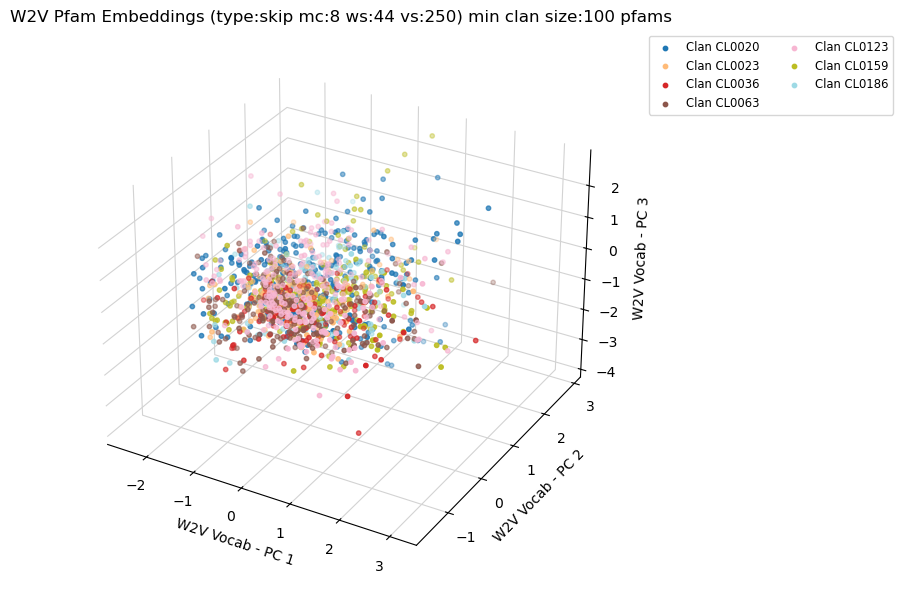

w2v_20240920_0_mc8_w44_v25_g50
Assessing model: w2v_20240920_0_mc8_w44_v25_g50 type: cbow mc: 8 ws: 44 vs: 25 : w/ vocab size: 11711
model w2v_20240920_0_mc8_w44_v25_g50 8 vs:25 full vocab size : 11711 11711 | X: (1452, 25) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


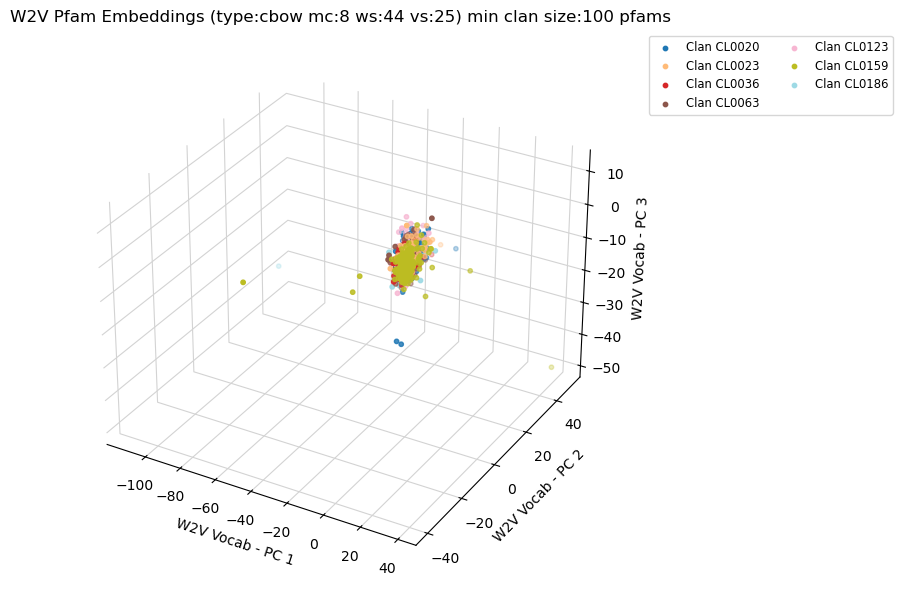

w2v_20240920_1_mc8_w44_v5_g50
Assessing model: w2v_20240920_1_mc8_w44_v5_g50 type: skip mc: 8 ws: 44 vs: 5 : w/ vocab size: 11711
model w2v_20240920_1_mc8_w44_v5_g50 8 vs:5 full vocab size : 11711 11711 | X: (1452, 5) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


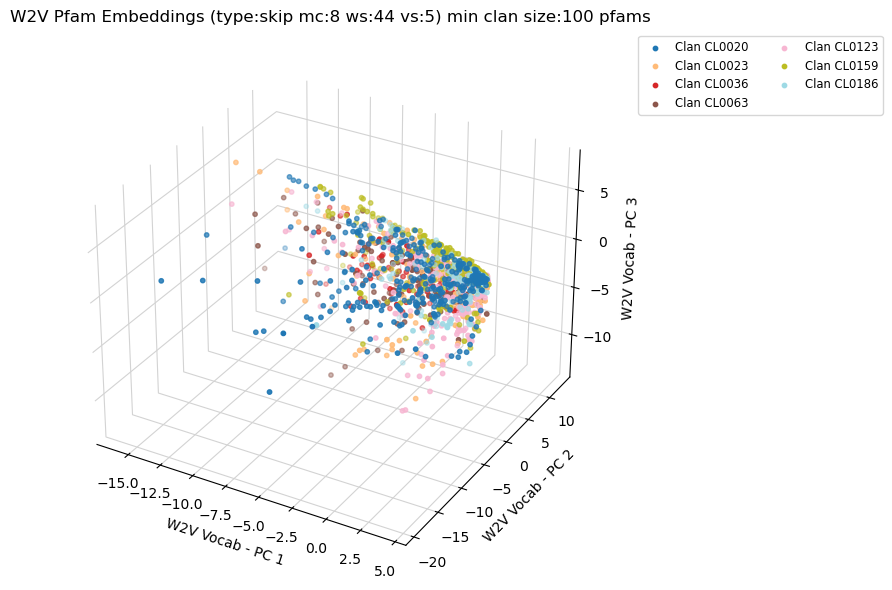

w2v_20240920_0_mc8_w44_v5_g50
Assessing model: w2v_20240920_0_mc8_w44_v5_g50 type: cbow mc: 8 ws: 44 vs: 5 : w/ vocab size: 11711
model w2v_20240920_0_mc8_w44_v5_g50 8 vs:5 full vocab size : 11711 11711 | X: (1452, 5) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


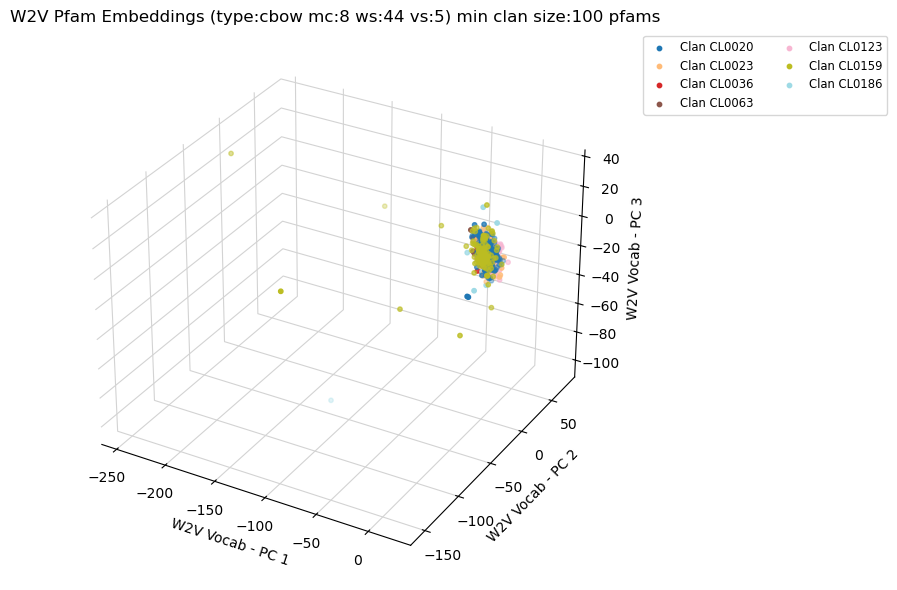

w2v_20240921_0_mc8_w44_v100
Assessing model: w2v_20240921_0_mc8_w44_v100 type: cbow mc: 8 ws: 44 vs: 100 : w/ vocab size: 11711
model w2v_20240921_0_mc8_w44_v100 8 vs:100 full vocab size : 11711 11711 | X: (1452, 100) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


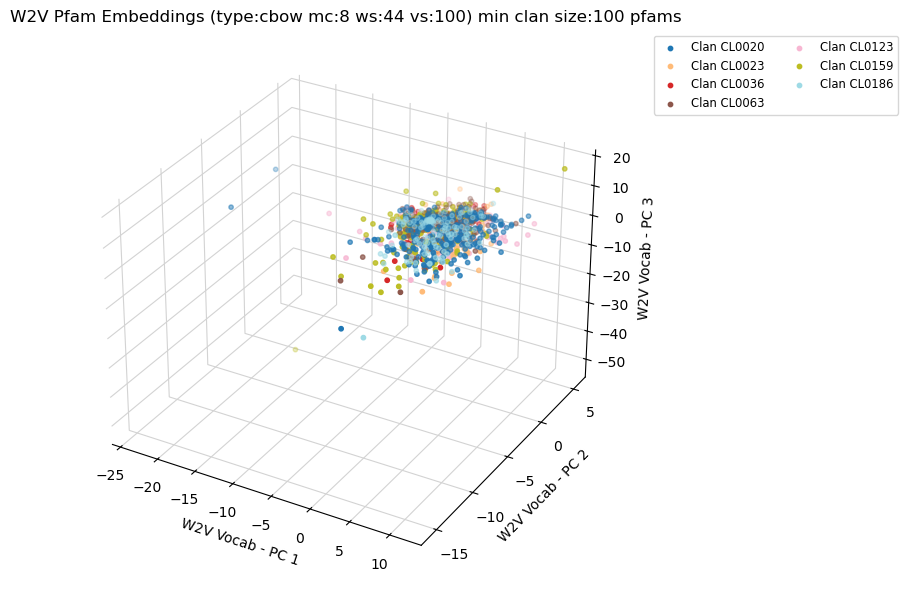

w2v_20240921_1_mc8_w44_v500
Assessing model: w2v_20240921_1_mc8_w44_v500 type: skip mc: 8 ws: 44 vs: 500 : w/ vocab size: 11711
model w2v_20240921_1_mc8_w44_v500 8 vs:500 full vocab size : 11711 11711 | X: (1452, 500) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


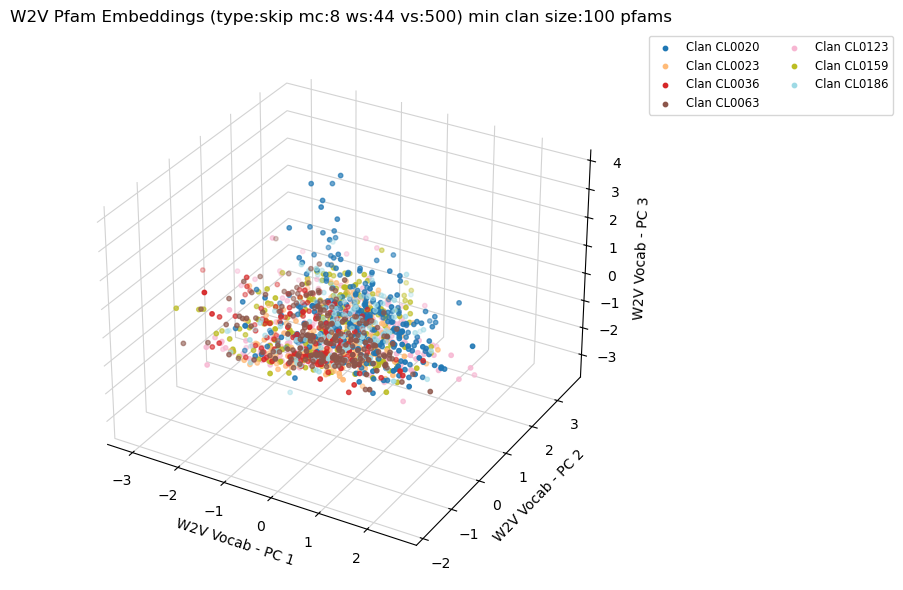

w2v_20240921_0_mc8_w44_v50
Assessing model: w2v_20240921_0_mc8_w44_v50 type: cbow mc: 8 ws: 44 vs: 50 : w/ vocab size: 11711
model w2v_20240921_0_mc8_w44_v50 8 vs:50 full vocab size : 11711 11711 | X: (1452, 50) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


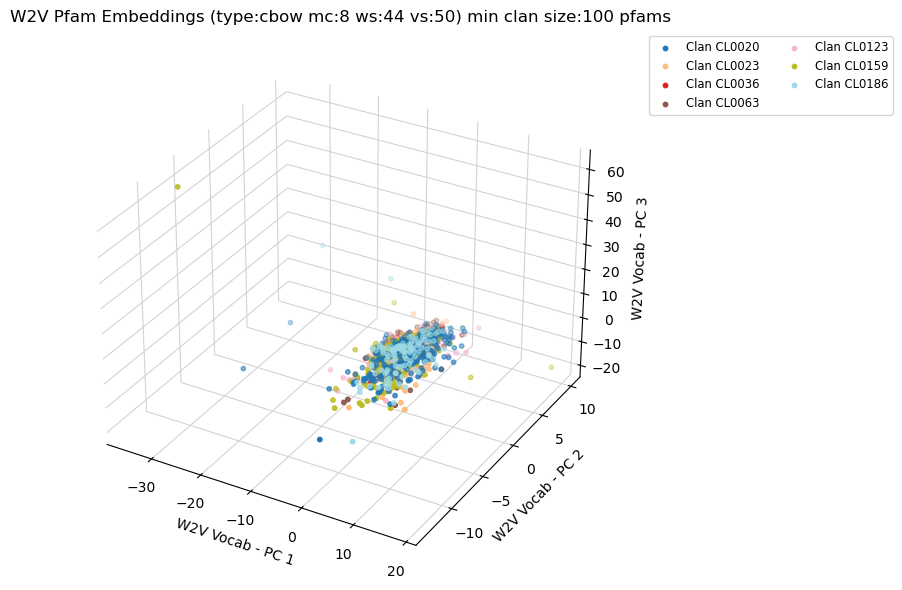

w2v_20240920_1_mc8_w44_v25_g50
Assessing model: w2v_20240920_1_mc8_w44_v25_g50 type: skip mc: 8 ws: 44 vs: 25 : w/ vocab size: 11711
model w2v_20240920_1_mc8_w44_v25_g50 8 vs:25 full vocab size : 11711 11711 | X: (1452, 25) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


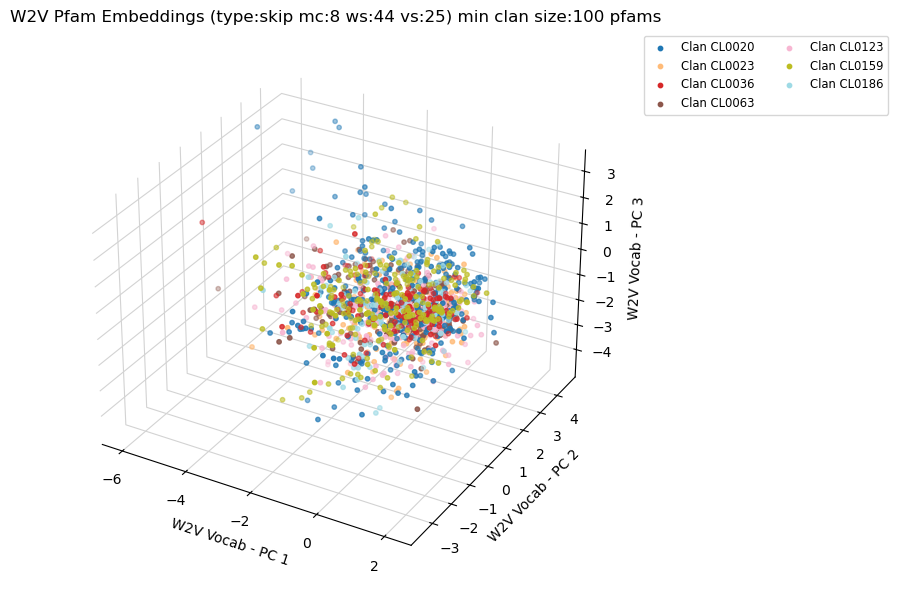

w2v_20240921_0_mc8_w44_v500
Assessing model: w2v_20240921_0_mc8_w44_v500 type: cbow mc: 8 ws: 44 vs: 500 : w/ vocab size: 11711
model w2v_20240921_0_mc8_w44_v500 8 vs:500 full vocab size : 11711 11711 | X: (1452, 500) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


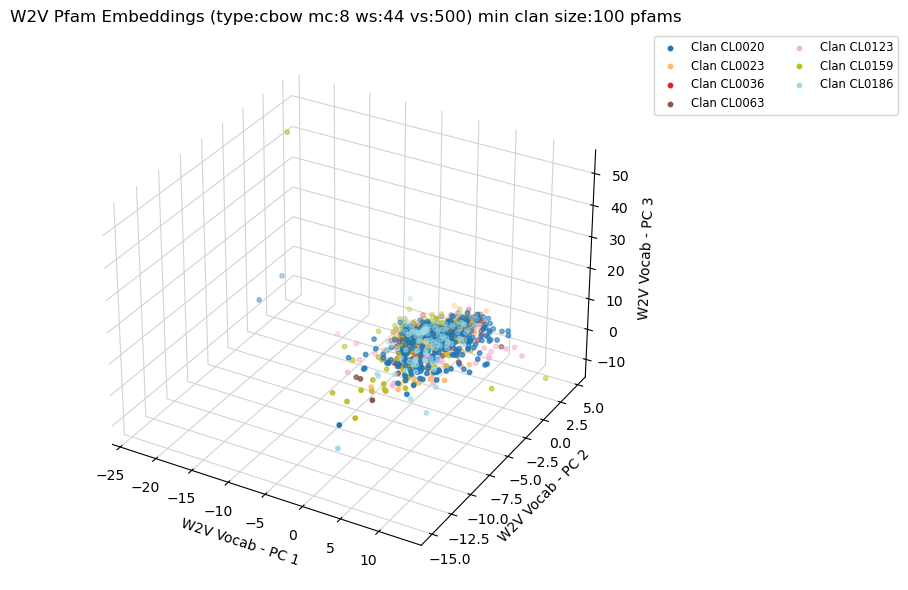

w2v_20240921_1_mc8_w44_v50
Assessing model: w2v_20240921_1_mc8_w44_v50 type: skip mc: 8 ws: 44 vs: 50 : w/ vocab size: 11711
model w2v_20240921_1_mc8_w44_v50 8 vs:50 full vocab size : 11711 11711 | X: (1452, 50) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


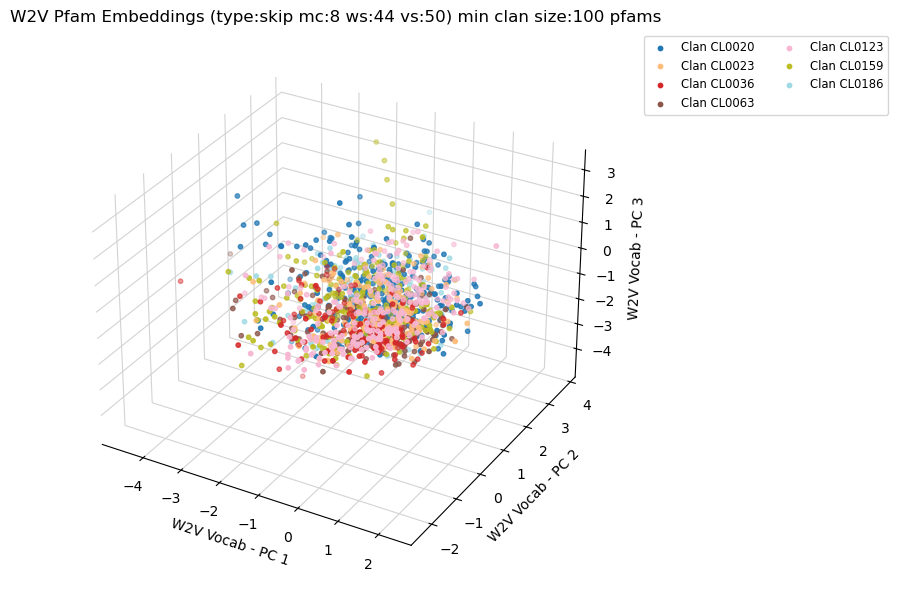

w2v_20240921_1_mc8_w44_v100
Assessing model: w2v_20240921_1_mc8_w44_v100 type: skip mc: 8 ws: 44 vs: 100 : w/ vocab size: 11711
model w2v_20240921_1_mc8_w44_v100 8 vs:100 full vocab size : 11711 11711 | X: (1452, 100) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


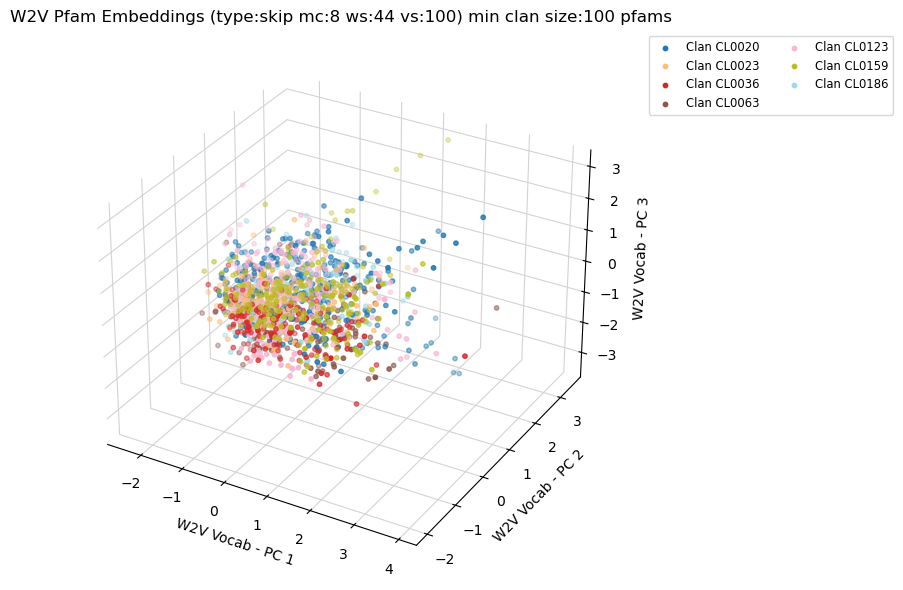

w2v_20240922_1_mc8_w44_v500_g100
Assessing model: w2v_20240922_1_mc8_w44_v500_g100 type: skip mc: 8 ws: 44 vs: 500 : w/ vocab size: 11504
model w2v_20240922_1_mc8_w44_v500_g100 8 vs:500 full vocab size : 11504 11504 | X: (1438, 500) | Y : 1438 | clans : 7
Plotting 1438 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


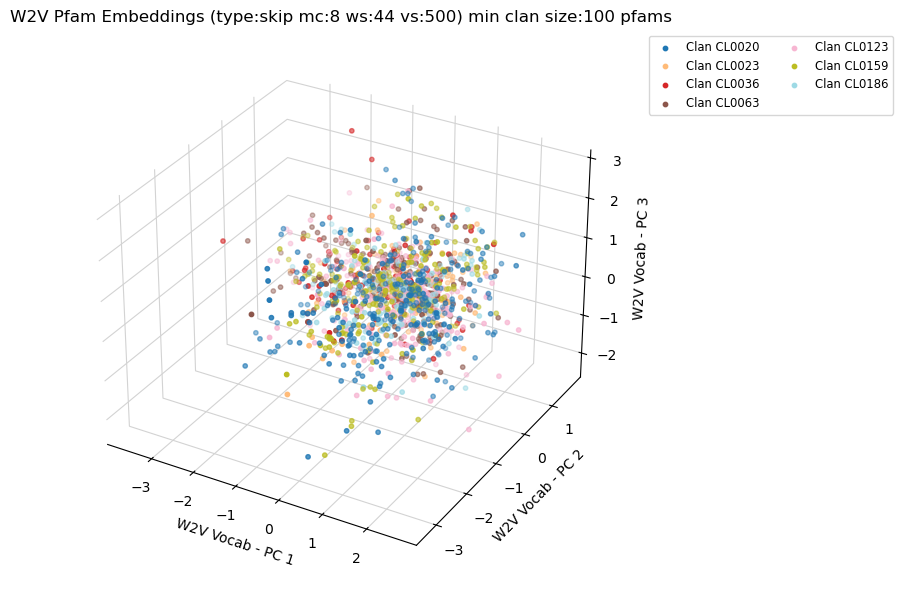

w2v_20240921_0_mc8_w44_v250
Assessing model: w2v_20240921_0_mc8_w44_v250 type: cbow mc: 8 ws: 44 vs: 250 : w/ vocab size: 11711
model w2v_20240921_0_mc8_w44_v250 8 vs:250 full vocab size : 11711 11711 | X: (1452, 250) | Y : 1452 | clans : 7
Plotting 1452 from 7 categories


/var/folders/kp/bqnb4b7n4ng50xtbznpbx7xh0000gn/T/ipykernel_19661/3498457424.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap    = plt.cm.get_cmap('tab20', len(unique_categories))


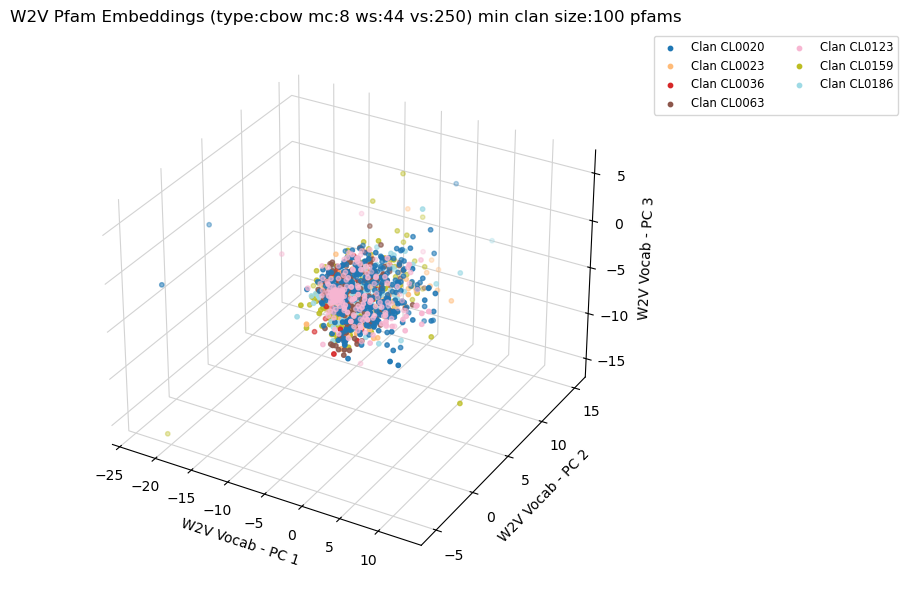

'\n\n# best pearson with gap of 50 : w2v_20240920_1_mc8_w44_v25_g50\n\nmodel_names = [\'w2v_20240920_1_mc8_w44_v25_g50\']\n# restrict the graph to only certain size of clans\nmin_cs = 100\nfor model_name in model_names:\n    model_path  = model_dir+model_name+\'.model\'\n    \n    min_count_s = re.search("mc([0-9]+)_", model_name)\n    min_count   = min_count_s.group(1)\n    vector_s    = re.search("v([0-9]+)", model_name)\n    vector_size = vector_s.group(1)\n    window_s    = re.search("w([0-9]+)", model_name)\n    window_size = window_s.group(1)\n\n    # get vocab for model\n    full_vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=True)\n    \n    print(f"Full vocab for model: {vocab_count} vector size is {vector_size}")\n    filtered_pfams, filtered_clans, filtered_clan_dict = get_pfam_clans_for_model(model_name, model_path, min_cs)\n    \n    X, Y = get_clustering_inputs(model_path, filtered_pfams, int(vector_size))\n    \n    print(f"model {model_name} {min_count} vs

In [94]:




'''
('undef', 7966)
('CL0123', 361)
('CL0020', 337)
('CL0159', 292)
('CL0063', 226)
('CL0023', 216)
('CL0036', 174)
('CL0186', 138)
('CL0010', 118)
('CL0021', 115)
('CL0236', 95)
('CL0167', 90)
'''

# ------------------ To run for all files in model_dir


model_files     = find_files(model_dir, 'model')
min_cs          = 100

for model_file in model_files:
    model_path  = model_file[0]
    model_name  = model_file[1]
    
    print(model_name)
    model_type_s = re.search("_([0-9])_mc", model_name)
    mt   = model_type_s.group(1)
    
    if int(mt) == 0:
        model_type = 'cbow'
    elif int(mt) ==1:
        model_type = 'skip'
    
    min_count_s = re.search("mc([0-9]+)_", model_name)
    min_count   = min_count_s.group(1)
    vector_s    = re.search("_v([0-9]+)", model_name)
    vector_size = vector_s.group(1)
    window_s    = re.search("_w([0-9]+)_", model_name)
    window_size = window_s.group(1)
    
    # get vocab for model
    full_vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=True)
    
    print(f"Assessing model: {model_name} type: {model_type} mc: {min_count} ws: {window_size} vs: {vector_size} : w/ vocab size: {vocab_count}")
    filtered_pfams, filtered_clans, filtered_clan_dict = get_pfam_clans_for_model(model_name, model_path, min_cs)
    
    X, Y = get_clustering_inputs(model_path, filtered_pfams, int(vector_size))
    
    print(f"model {model_name} {min_count} vs:{vector_size} full vocab size : {vocab_count} {len(full_vocab)} | X: {X.shape} | Y : {len(Y)} | clans : {len(filtered_clans)}")
    
    title = 'W2V Pfam Embeddings (type:' + model_type + ' mc:' + str(min_count) +' ws:' + str(window_size) +' vs:' + str(vector_size) + ') min clan size:'+ str(min_cs)+' pfams'

    # Perform PCA and plot results - color coded per clan
    #graph_2d_pca_color(X, Y, title)
    graph_3d_pca_colour(X, Y, title)




# ------------------ To run for one file in model_dir

'''

# best pearson with gap of 50 : w2v_20240920_1_mc8_w44_v25_g50

model_names = ['w2v_20240920_1_mc8_w44_v25_g50']
# restrict the graph to only certain size of clans
min_cs = 100
for model_name in model_names:
    model_path  = model_dir+model_name+'.model'
    
    min_count_s = re.search("mc([0-9]+)_", model_name)
    min_count   = min_count_s.group(1)
    vector_s    = re.search("v([0-9]+)", model_name)
    vector_size = vector_s.group(1)
    window_s    = re.search("w([0-9]+)", model_name)
    window_size = window_s.group(1)

    # get vocab for model
    full_vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=True)
    
    print(f"Full vocab for model: {vocab_count} vector size is {vector_size}")
    filtered_pfams, filtered_clans, filtered_clan_dict = get_pfam_clans_for_model(model_name, model_path, min_cs)
    
    X, Y = get_clustering_inputs(model_path, filtered_pfams, int(vector_size))
    
    print(f"model {model_name} {min_count} vs:{vector_size} full vocab size : {vocab_count} {len(full_vocab)} | X: {X.shape} | Y : {len(Y)} | clans : {len(filtered_clans)}")
    
    title = 'W2V Pfam Embeddings (mc:' + str(min_count) +' ws:' + str(window_size) +' vs:' + str(vector_size) + ') min clan size:'+ str(min_cs)+' pfams'

    # Perform PCA and plot results - color coded per clan
    graph_2d_pca_color(X, Y, title)
    graph_3d_pca_colour(X, Y, title)
'''
    

## Jaccard Similarity of clusters

In [ ]:
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))
     
    return intersection / union
 
set_a = {"Geeks", "for", "Geeks", "NLP", "DSc"}
set_b = {"Geek", "for", "Geeks", "DSc.", 'ML', "DSA"}
 
similarity = jaccard_similarity(set_a, set_b)
print("Jaccard Similarity:", similarity)

## General Corpus and Model Graphs

In [61]:
header_columns = ['rank', 'creation_time', 'model', 'type', 'mc', 'ws', 'vs', 'time']
model_creation_file = "/Users/patrick/dev/ucl/word2vec/comp_0158_msc_project/logs/model_creation/0910/0910_aws_cbow_creation_times.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(model_creation_file, sep=',', engine='python')
df.head()

## DEFINE MODELS & GET VOCAB VECTORS

### Graph the vectors in a model vocab

In [ ]:
#model_dir   ="/Users/patrick/dev/ucl/word2vec/COMP_0158_MSC_PROJECT/data/models/all_models_final/skip_mc8/"
#model_names=['w2v_20240901_sg1_mc8_w8_v5', 'w2v_20240901_sg1_mc8_w8_v10', 'w2v_20240901_sg1_mc8_w8_v25', 'w2v_20240901_sg1_mc8_w8_v50', 'w2v_20240901_sg1_mc8_w8_v75', 'w2v_20240901_sg1_mc8_w8_v100']

#model_dir   ="/Users/patrick/dev/ucl/word2vec/COMP_0158_MSC_PROJECT/data/models/"
#model_names = ['w2v_20240908_sg1_mc1_w3_v250']

model_dir   ="/Users/patrick/dev/ucl/word2vec/COMP_0158_MSC_PROJECT/data/models/"
#model_names = ['w2v_20240908_sg1_mc1_w3_v250']
model_names = ['w2v_20240908_sg1_mc1_w3_v500']

for model_name in model_names:

    model_path = model_dir+model_name+'.model'
    min_count_s = re.search("(mc[0-9]+)_", model_name)
    min_count = min_count_s.group(1)
    vector_s = re.search("v([0-9]+)", model_name)
    vector_size = vector_s.group(1)

    # get vocab for model
    #vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=False)
    vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=True)
    
    X, Y, pfam_ids = get_model_vectors_clan_only(model_path, min_count, int(vector_size))
    
    graph_2d(X, model_name)

#### Min Count 8 - Window Size 13

In [ ]:
model_dir   ="/Users/patrick/dev/ucl/word2vec/COMP_0158_MSC_PROJECT/data/models/all_models_final/skip_mc8/"
model_names=['w2v_20240901_sg1_mc8_w13_v5', 'w2v_20240901_sg1_mc8_w13_v10', 'w2v_20240901_sg1_mc8_w13_v25', 'w2v_20240901_sg1_mc8_w13_v50', 'w2v_20240901_sg1_mc8_w13_v75', 'w2v_20240901_sg1_mc8_w13_v100']


for model_name in model_names:

    model_path = model_dir+model_name+'.model'
    min_count_s = re.search("(mc[0-9]+)_", model_name)
    min_count = min_count_s.group(1)
    vector_s = re.search("v([0-9]+)", model_name)
    vector_size = vector_s.group(1)

    vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=False)
    
    X, Y, pfam_ids = get_model_vectors_clan_only(model_path, min_count, int(vector_size))
    
    graph_2d(X, model_name)

#### Min Count 8 - Window Size 44

In [ ]:
model_dir   ="/Users/patrick/dev/ucl/word2vec/COMP_0158_MSC_PROJECT/data/models/all_models_final/skip_mc8/"
model_names=['w2v_20240903_sg1_mc8_w44_v5', 'w2v_20240903_sg1_mc8_w44_v10', 'w2v_20240903_sg1_mc8_w44_v25', 'w2v_20240903_sg1_mc8_w44_v50', 'w2v_20240903_sg1_mc8_w44_v75', 'w2v_20240902_sg1_mc8_w44_v100']


for model_name in model_names:

    model_path = model_dir+model_name+'.model'
    min_count_s = re.search("(mc[0-9]+)_", model_name)
    min_count = min_count_s.group(1)
    vector_s = re.search("v([0-9]+)", model_name)
    vector_size = vector_s.group(1)

    vocab, vocab_count = get_pfam_vocab(model_path, exclude_gaps=False)
    
    X, Y, pfam_ids = get_model_vectors_clan_only(model_path, min_count, int(vector_size))
    
    graph_2d(X, model_name)

#### Graph the models

In [ ]:
graph_2d(X, model_name)